In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #Per normalizzare i dati -> porto i dati su una scala comune per migliorare le prestazioni dei modelli di machine learning

data = pd.read_csv('./KyotoDataset.csv', index_col='AD', usecols=["AD","Full-flowering date (DOY)"])

#creo una copia della colonna index
data["Year"] = data.index

#creo la media mobile -> si usa per l'analisi di serie storiche. Si calcola rispetto ad una finestra temporale fissata
#la media mobile è centrata, cioè viene calcolata attorno al punto mediano della finestra di 30 anni
data['DateMean'] = data['Full-flowering date (DOY)'].rolling(window=30, center = True).mean()

#pulisco i dati eliminando i campi in cui la media mobile non è NaN
data = data.dropna(subset=['DateMean'])

data

,Full-flowering date (DOY),Year,DateMean
AD,,,
1961,99.0,1961,100.133333
1962,102.0,1962,100.200000
1963,101.0,1963,99.733333
1964,99.0,1964,99.800000
1965,110.0,1965,99.466667
1966,97.0,1966,99.566667
1967,97.0,1967,99.600000
1968,99.0,1968,99.200000
1969,101.0,1969,99.133333


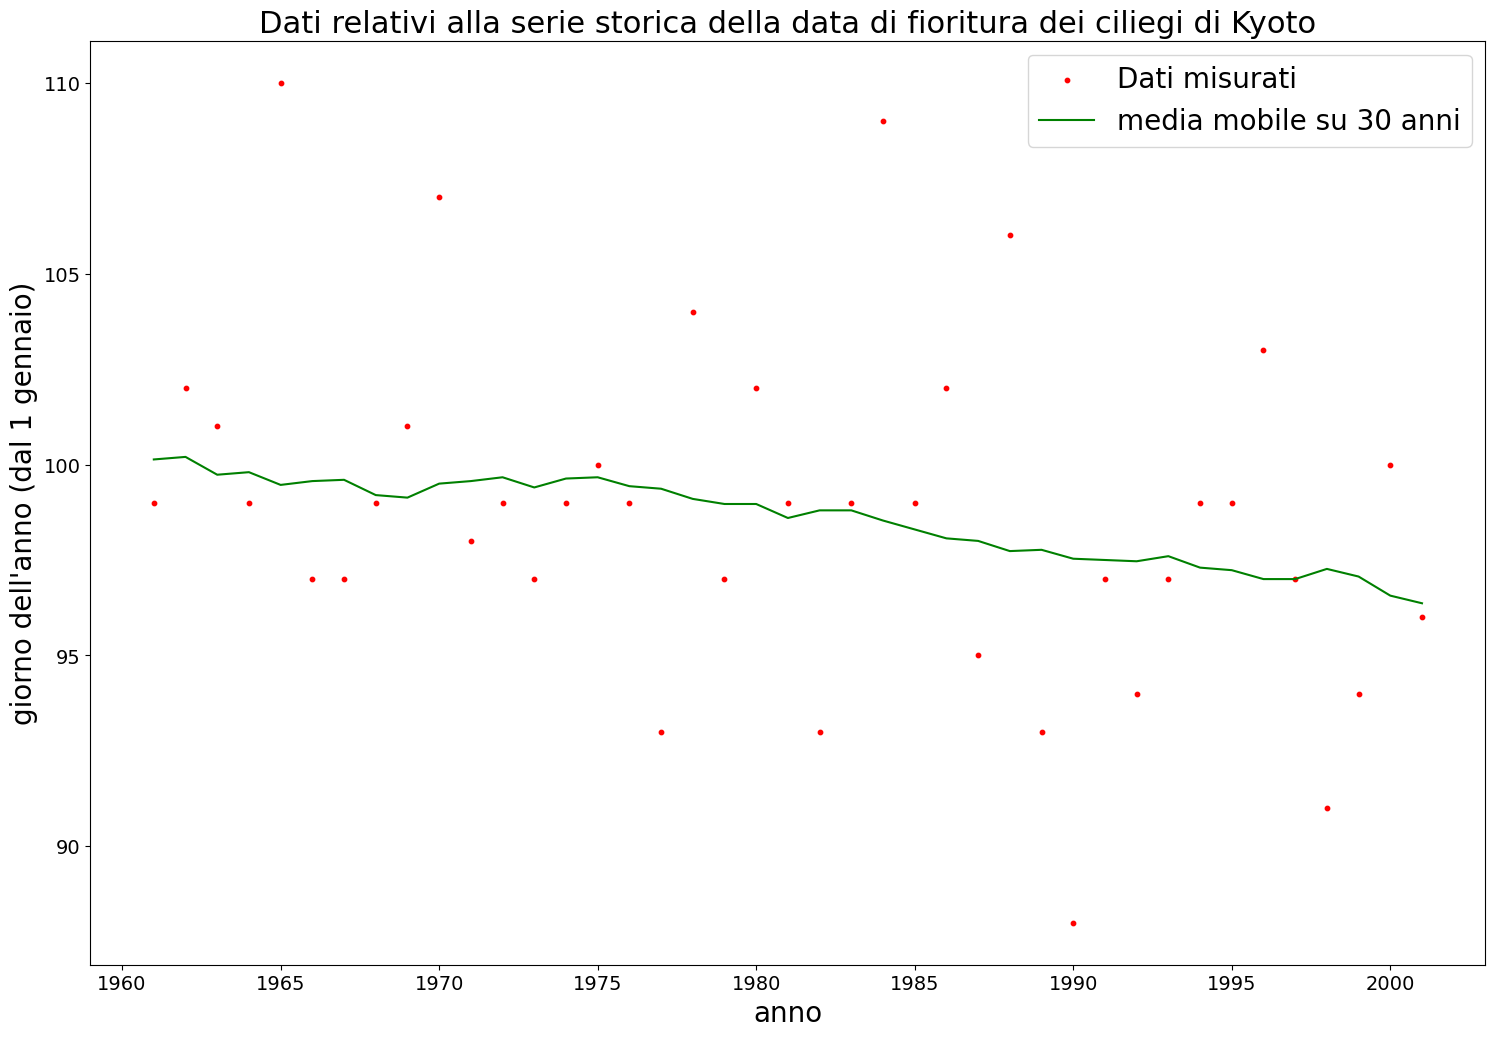

In [2]:
#creo grafico scatter relativo ai campioni del dataset e traccio la linea di tendenza usando la media mobile
fig, ax = plt.subplots(figsize=(18,12))
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Dati relativi alla serie storica della data di fioritura dei ciliegi di Kyoto', fontsize=22)

data.plot.scatter(x='Year', y='Full-flowering date (DOY)', label='Dati misurati', s=10, color='r', ax=ax)
data.DateMean.plot(label="media mobile su 30 anni", color='g', ax=ax) 

ax.set_xlabel("anno", fontsize=20)
ax.set_ylabel("giorno dell'anno (dal 1 gennaio)", fontsize=20)

#ax.text(1900,89, u'Dati da Aono and Kazui, 2008; Aono e Saito, 2010; Aono 2015', style='italic', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [3]:
#Cosa noto osservando il grafico?
#Questo modello utilizza una sola feature --> è sufficiente per rappresentare la variabilità dei campioni?
#Cosa faccio?

In [4]:
#Effetto la normalizzazione per tutte le feature e per tutte le variabili target

#estraggo i dati in array numpy --> X è feature, y è variabile target
X= data[['Year']].values   #devo converire in una matrice per poter addestrare il modello
y = data[['Full-flowering date (DOY)']].values

#NORMALIZZAZIONE -> trasformo i dati in modo tale che abbiano una media pari a 0 e una deviazione standard pari a 1. 
#È utile nei modelli di machine learning per:
#1. migliorare la convergenza del modello durante l'addestramento
#2. evitare che una variabile influenzi il modello più delle altre solo perché ha una scala numerica più grande o più piccola

#standard scaler per la feature
sc_x = StandardScaler()
#standard scaler per la variabile feature
sc_y = StandardScaler()

#normalizzo le feature
X_sc = sc_x.fit_transform(X) 
#normalizzo la variabile target
y_sc = sc_y.fit_transform(y)

In [5]:
#Addestramento del modello di regressione lineare con LinearRegression
reg = LinearRegression().fit(X_sc, y_sc)

print(f"Coefficiente di determinazione R^2 : {reg.score(X_sc,y_sc):.2f}")
print(f"Coefficiente angolare vale : {reg.coef_[0][0]:.2f}")
print(f"Intercetta vale : {reg.intercept_[0]:.2f}")

Coefficiente di determinazione R^2 : 0.11
Coefficiente angolare vale : -0.33
Intercetta vale : -0.00


In [6]:
#come interpreto i dati
#Il trend corrisponde ad una retta con coefficiente angolare di -0.33 -> trend decrescente -> si anticipa la fioritura
#I dati normalizzati sono stati traslati di una quantità pari alla loro media -> per questo hanno media 0 e sono centrati sull'origine
#La retta che meglio approssima i dati normalizzati passa per l'origine -> intercetta è 0

In [7]:
# Valutazione del modello -> predizione
# anno futuro per la predizione
year = 2021

# Normalizzo l'anno futuro
year_std = sc_x.transform([[year]])

# Prevedo il giorno di fioritura
day_std = reg.predict(year_std)

# Operazione di normalizzazione inversa 
day_predicted = sc_y.inverse_transform(day_std)

# Stampa il risultato
print(f"Giorno di fioritura previsto nel {year}: {day_predicted[0][0]:.0f}")


Giorno di fioritura previsto nel 2021: 94


In [11]:
#aggiungo la retta di regressione nel datafram data
data["Linear Regression"] = sc_y.inverse_transform(reg.predict(X_sc))

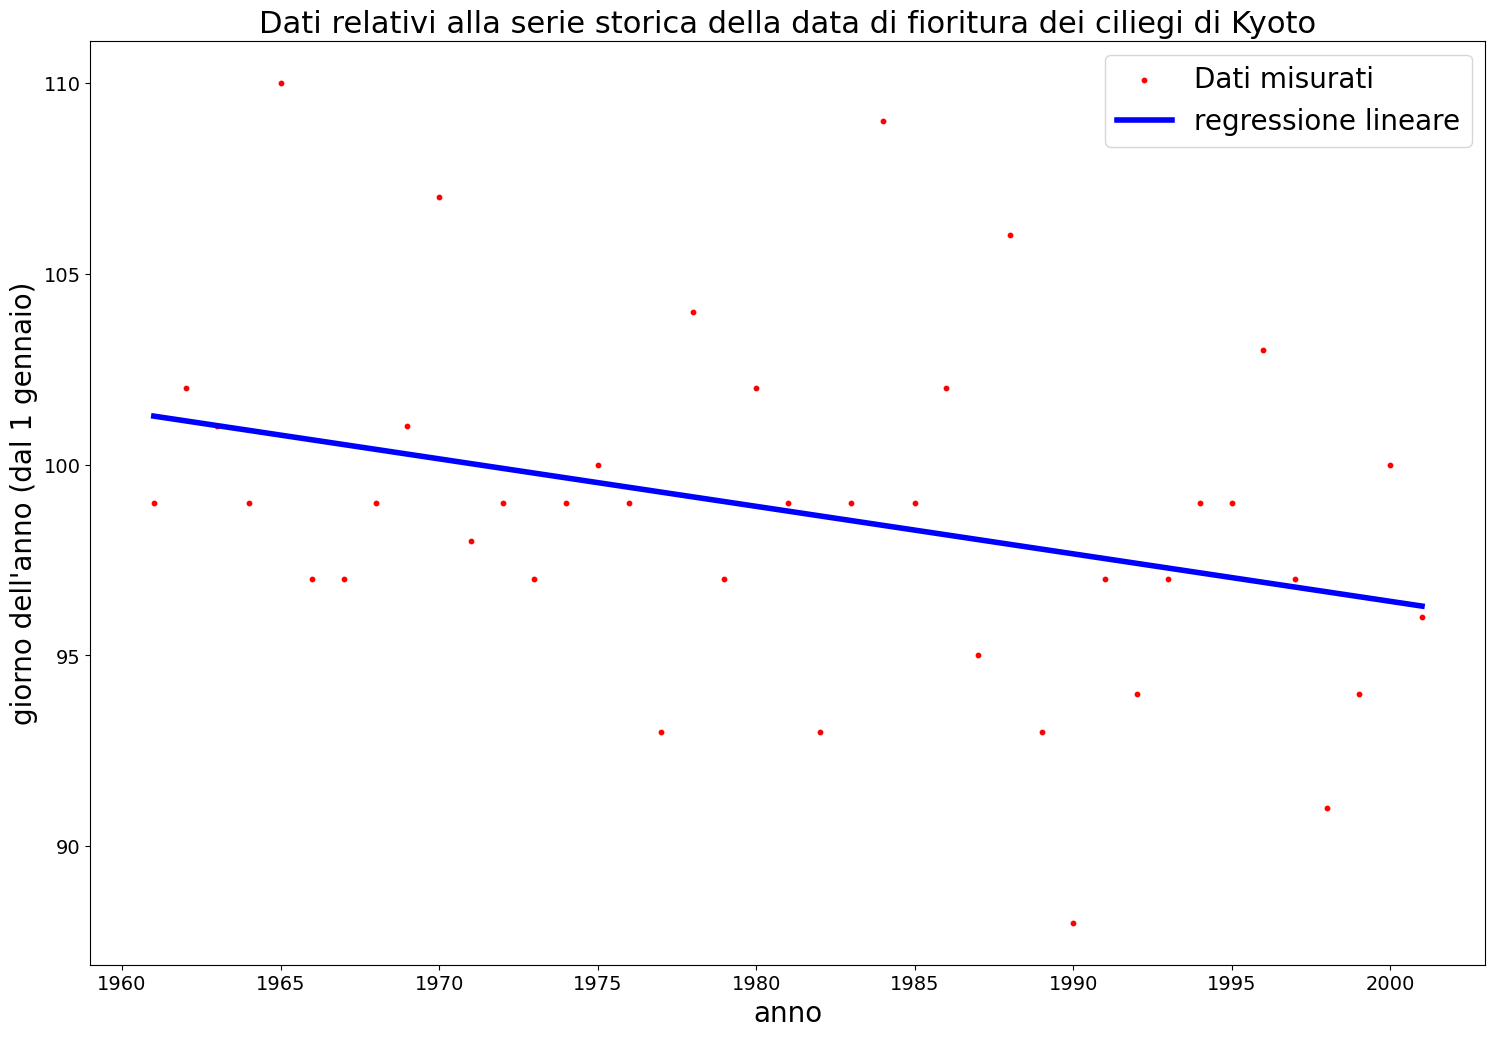

In [12]:
#creo grafico scatter relativo ai campioni del dataset e traccio la retta di regressione
fig, ax = plt.subplots(figsize=(18,12))
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Dati relativi alla serie storica della data di fioritura dei ciliegi di Kyoto', fontsize=22)

data.plot.scatter(x='Year', y='Full-flowering date (DOY)', label='Dati misurati', s=10, color='r', ax=ax)

data["Linear Regression"].plot(label='regressione lineare', lw=4, ax=ax, color='b')

ax.set_xlabel("anno", fontsize=20)
ax.set_ylabel("giorno dell'anno (dal 1 gennaio)", fontsize=20)

#ax.text(1900,89, u'Dati da Aono and Kazui, 2008; Aono e Saito, 2010; Aono 2015', style='italic', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [13]:
#cosa noto?
#come è il trend del modello di regressione lineare? --> discendente
#cosa è successo alla fioritura dei ciliegi?
#a voi le conclusioni ...